<h1>Titaniс Kaggle competition</h1>

This is binary classification problem, supervised machine learning.

In our `train.csv` dataset we have `Survived` column. It will be our target. There are some problems that need to be addresed before we start training various models. Let's take a look on the original dataset: 


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_path = "train.csv"

titanic_df = pd.read_csv(train_path)
titanic_df.fillna(0, inplace=True) # just first step
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


Data in columns `Sex`, `Embarked`, `Pclass` seems categorical. We have to encode several of them in our models. Let's try one-hot encoding.

After that we should take care about different scale in `Age` and `Fare`. 

I will ignore `Names`, `Tickets` and `Cabin` for a while.

In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

print(f"Mean \"Survived\" value: {titanic_df['Survived'].mean():.2f}")

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'SibSp', 'Parch', 'Embarked']

X = titanic_df[features].copy()
y = titanic_df['Survived'].copy()
y.columns = ['Survived']
scaler = MinMaxScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

X = pd.get_dummies(X, prefix=['Pclass', 'Sex', 'Embarked'], columns=['Pclass', 'Sex', 'Embarked'])

X.head(3)

Mean "Survived" value: 0.38


,Age,SibSp,Parch,Fare,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,0.275,1,0,0.014151,1,0,0,0,1,0,1,0,0,0,1
1,0.475,1,0,0.139136,1,0,1,0,0,1,0,0,1,0,0
2,0.325,0,0,0.015469,0,0,0,0,1,1,0,0,0,0,1


`Survived` column mean value is less than 0.5. It means, there are more dead people in our dataset, than survived. We have to pay attention to the fact during our train-test splitting.

I will start with simple LogisticRegression (with cross-validation).

Age importance: -0.9899
SibSp importance: -0.1502
Parch importance: 0.0105
Fare importance: 0.2901
SibSp importance: -0.1502
Parch importance: 0.0105
Pclass_1 importance: 0.9034
Pclass_2 importance: 0.0719
Pclass_3 importance: -0.9751
Sex_female importance: 1.2602
Sex_male importance: -1.2601
Embarked_0 importance: 0.0688
Embarked_C importance: 0.1915
Embarked_Q importance: -0.0244
Embarked_S importance: -0.2357
R2-score = 0.17457180500658742
mean absolute error = 0.19553072625698323


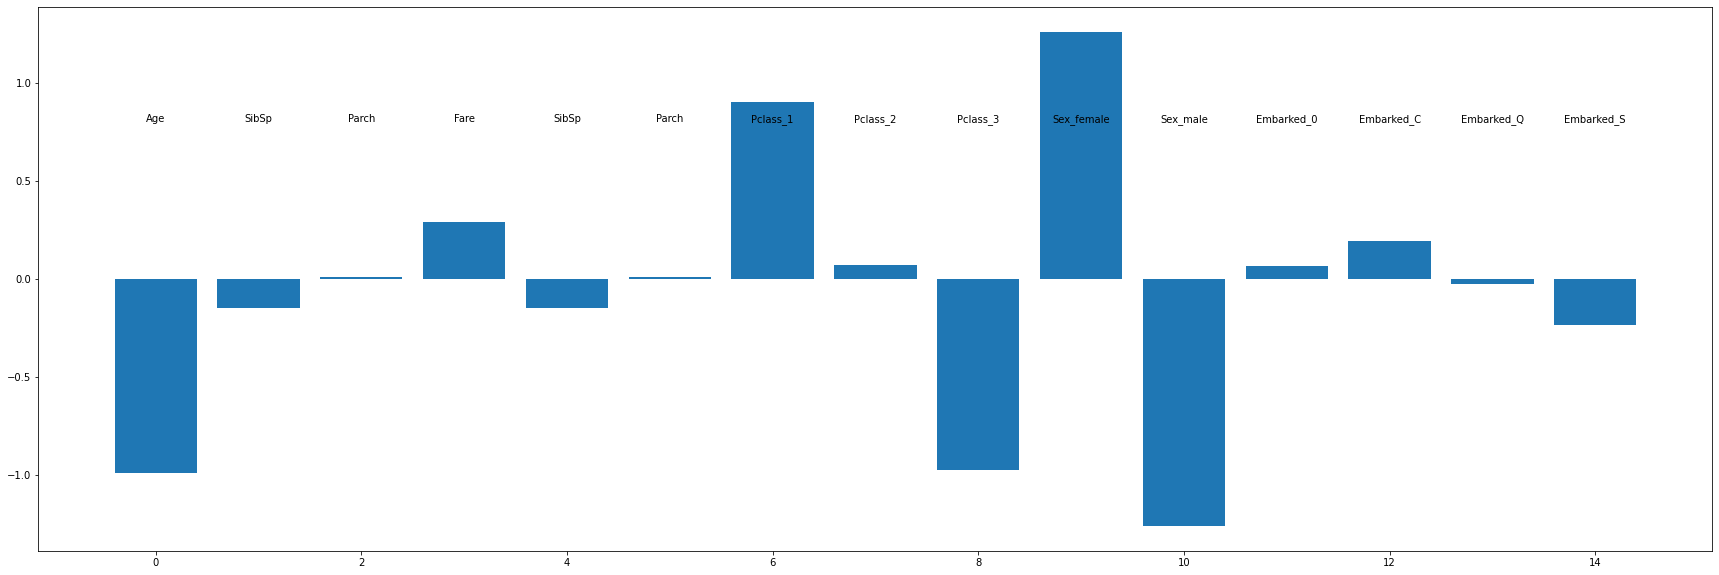

     True  Predicted
232     0          0
54      0          0
277     0          0
385     0          0
75      0          0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from matplotlib import pyplot
from sklearn.metrics import r2_score, mean_absolute_error

def add_value_label(x_list,y_coord,y_list):
    for i in range(len(x_list)):
        pyplot.text(i,0.8,y_list[i], ha="center")

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
logistic_model = LogisticRegressionCV(cv = 5, max_iter=100, random_state=1)

logistic_model.fit(train_X, train_y)
importance = logistic_model.coef_[0]
predictions = logistic_model.predict(test_X)

i = 0
for feature in X.columns:
    print(f"{feature} importance: {importance[i]:.4f}")
    i += 1
print(f"R2-score = {r2_score(test_y.values, predictions)}")
print(f"mean absolute error = {mean_absolute_error(test_y, predictions)}")

i = [j for j in range(len(importance))]
pyplot.bar(i, importance)
pyplot.rcParams['figure.figsize'] = [30, 10]
add_value_label(i, importance, X.columns) 
pyplot.show()

result = pd.DataFrame()
result['True'] = test_y
result['Predicted'] = predictions
print(result.head())


Well. The model is shit. :)
Until the next time... 